In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Please find enclosed two datasets of daylight and skylight.
The Daylight dataset ranges from 380 nm to 780 nm, with a 5 nm step. The Skylight ranges from 370 nm to 790 nm with a 5 nm step.
 
Therefore the Skylight dataset needs to be trimmed at both ends so it’s 81 values from 380 to 780.
 
From there both datasets need to be interpolated so they contains 401 values, i.e. going from a 5 nm step to a 1 nm step.
 
The LED dataset, i.e. EMPIR, ranges from 360 nm to 830 nm, with a 1 nm step, i.e. 471 values. It will also need to be trimmed at both ends so it’s 401 values between 380 nm to 780 nm.
 
Then you would need to create random mix between EMPIR and Daylight and EMPIR and Skylight, in order to extend the dataset.


In [2]:
data01=pd.read_csv("GranadaDaylight_81.csv")


In [3]:
data_Day = data01.values
data_Day.shape

(80, 2600)

In [4]:
original_wavelengths = np.arange(380, 780, 1)
original_wavelengths.shape

(400,)

插值，用样条插值试一试


In [5]:
import numpy as np
from scipy.interpolate import interp1d

# 定义原始波长范围和新的波长范围
original_wavelengths = np.arange(380, 780, 5)
#new_wavelengths = np.arange(380, 780)  # 修改这里，将范围与original_wavelengths保持一致
new_wavelengths = np.linspace(380, 780, 401)[:-1]  # 使用np.linspace生成包括结束点的数组，并在最后截断一个元素

# 初始化一个新的数据集，形状为(400, 2600)
data_daylight = np.zeros((400, 2600))

# 对于每个波段，进行插值，这里使用三次样条插值
for i in range(data_Day.shape[1]):
    f = interp1d(original_wavelengths, data_Day[:, i], kind='quadratic', fill_value = "extrapolate")
    data_daylight[:, i] = f(new_wavelengths)

# 现在，new_data数组包含了插值后的数据，步长为1nm


In [6]:
data_daylight.shape


(400, 2600)

In [8]:
np.save("data_daylight.npy",data_daylight)

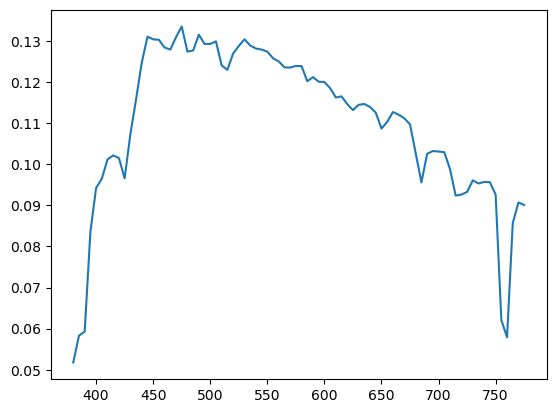

In [26]:
import matplotlib.pyplot as plt

plt.plot(original_wavelengths, data_Day[:,1000])

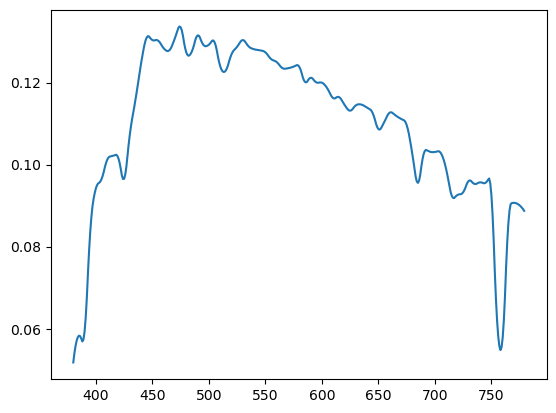

In [27]:
plt.plot(new_wavelengths, data_daylight[:,1000])

In [10]:

data02 = pd.read_csv("GranadaSkylight_85.csv")

In [11]:
data_Sky = data02.values
data_Sky.shape

(84, 1567)

In [12]:
data_Sky = np.delete(data_Sky, [0,1,-2,-1], axis= 0)

In [13]:
data_Sky.shape

(80, 1567)

In [14]:
original_wavelengths = np.arange(380, 780, 5)
#new_wavelengths = np.arange(380, 780)  # 修改这里，将范围与original_wavelengths保持一致
new_wavelengths = np.linspace(380, 780, 401)[:-1]  # 使用np.linspace生成包括结束点的数组，并在最后截断一个元素

# 初始化一个新的数据集，形状为(400, 1567)
data_skylight = np.zeros((400, 1567))

# 对于每个波段，进行插值，这里使用三次样条插值
for i in range(data_Sky.shape[1]):
    f = interp1d(original_wavelengths, data_Sky[:, i], kind='quadratic', fill_value = "extrapolate")
    data_skylight[:, i] = f(new_wavelengths)

# 现在，new_data数组包含了插值后的数据，步长为1nm

In [15]:
data_skylight.shape

(400, 1567)

In [16]:
np.save("data_skylight.npy",data_skylight)

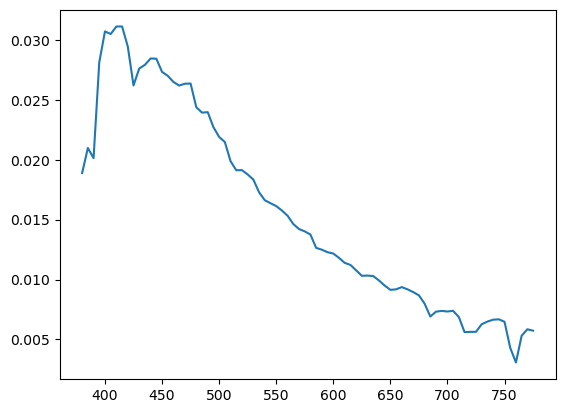

In [28]:
original_wavelengths = np.arange(380, 780, 5)

plt.plot(original_wavelengths, data_Sky[:,1000])

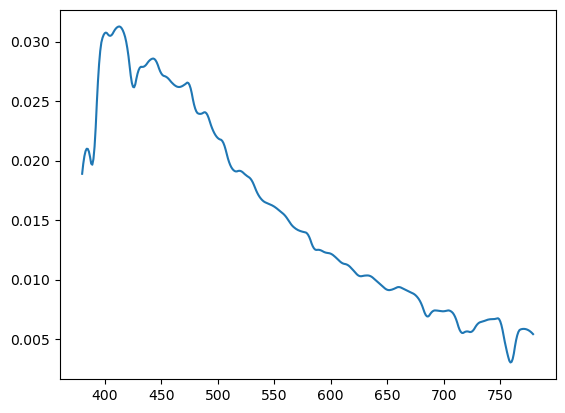

In [29]:

plt.plot(new_wavelengths, data_skylight[:,1000])

now i have 2 dataset:

1. Daylight (400,2600)
2. Skylight (400,1567)


In [17]:
data03 = np.load("/Users/dongtianchi/Documents/GIT/SpectralReconstruction/ComputationalSpectrometers/Draft/PCA/cleandata.npy", allow_pickle=True)

In [18]:
data03.shape  

(471, 1494)

In [19]:
t = range(20)
data_spectrum = np.delete(data03, t, axis = 0)

In [20]:
delete_list = []
for i in range(20):
    delete_list.append(i)

for k in range(-1,-52,-1):
    delete_list.append(k)

delete_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -7,
 -8,
 -9,
 -10,
 -11,
 -12,
 -13,
 -14,
 -15,
 -16,
 -17,
 -18,
 -19,
 -20,
 -21,
 -22,
 -23,
 -24,
 -25,
 -26,
 -27,
 -28,
 -29,
 -30,
 -31,
 -32,
 -33,
 -34,
 -35,
 -36,
 -37,
 -38,
 -39,
 -40,
 -41,
 -42,
 -43,
 -44,
 -45,
 -46,
 -47,
 -48,
 -49,
 -50,
 -51]

360- 830

380 - 780

In [21]:
data_spectrum = np.delete(data03, delete_list, axis = 0)
data_spectrum.shape

(400, 1494)

In [22]:
np.save("data_spectrum.npy",data_spectrum)

In [51]:
# 将这三个数据集沿着第二个维度堆叠在一起
merged_data = np.hstack((data_daylight, data_skylight, data_spectrum))

# 计算样本总数
total_samples = data_daylight.shape[1] + data_skylight.shape[1] + data_spectrum.shape[1]

# 生成一个随机排列的索引
random_indices = np.random.permutation(total_samples)

# 使用随机索引对数据集进行打乱
shuffled_data = merged_data[:, random_indices]

# 现在，shuffled_data数组包含了打乱后的数据，尺寸为（400，5661）

In [52]:
shuffled_data.shape

(400, 5661)

In [53]:
np.save("SpectrumData.npy",shuffled_data,"Deeplearning")

In [3]:
data = np.load("/Users/dongtianchi/Documents/GIT/SpectralReconstruction/ComputationalSpectrometers/Deeplearning/SpectrumData.npy", allow_pickle=True)
data.shape

(400, 5661)

In [5]:

# 计算扩充的数据点数量
num_augmented_samples = 5000

# 初始化一个新的扩充数据集
augmented_data = np.empty((400, 5661 + num_augmented_samples))

# 复制原始数据到新数据集中
augmented_data[:, :5661] = data

# 执行数据扩充
for i in range(5661, 5661 + num_augmented_samples):
    # 随机选择两个样本
    sample_idx_a = np.random.randint(0, 5661)
    sample_idx_b = np.random.randint(0, 5661)
    A = data[:, sample_idx_a]
    B = data[:, sample_idx_b]

    # 随机选择一个比例
    alpha = np.random.rand()

    # 计算新样本
    C = alpha * A + (1 - alpha) * B

    # 将新样本添加到扩充数据集中
    augmented_data[:, i] = C

# 现在，augmented_data 包含原始数据以及扩充数据


In [7]:
augmented_data.shape

(400, 10661)

In [ ]:
np.save("SpectrumEx.npy", augmented_data)